# Import Library and Load Dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
import psutil

In [ ]:
from google.colab import files

files.upload()

Saving dataset_31_credit-g.arff to dataset_31_credit-g.arff


{'dataset_31_credit-g.arff': b'% Description of the German credit dataset.\n% \n% 1. Title: German Credit data\n% \n% 2. Source Information\n% \n% Professor Dr. Hans Hofmann  \n% Institut f"ur Statistik und "Okonometrie  \n% Universit"at Hamburg  \n% FB Wirtschaftswissenschaften  \n% Von-Melle-Park 5    \n% 2000 Hamburg 13 \n% \n% 3. Number of Instances:  1000\n% \n% Two datasets are provided.  the original dataset, in the form provided\n% by Prof. Hofmann, contains categorical/symbolic attributes and\n% is in the file "german.data".   \n%  \n% For algorithms that need numerical attributes, Strathclyde University \n% produced the file "german.data-numeric".  This file has been edited \n% and several indicator variables added to make it suitable for \n% algorithms which cannot cope with categorical variables.   Several\n% attributes that are ordered categorical (such as attribute 17) have\n% been coded as integer.    This was the form used by StatLog.\n% \n% \n% 6. Number of Attributes 

In [ ]:
data = arff.loadarff('dataset_31_credit-g.arff')
df= pd.DataFrame(data[0])

# Get To Know The Dataset

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


Melalui observasi dataset, kita mendapatkan 21 kolom dengan detail sebagai berikut :

1. checking_status : status rekening giro yang ada, dalam Mark Jerman
2. duration : durasi dalam satu bulan
3. credit_history : riwayat kredit yang diberikan kepada klien
4. purpose : kepentingan kredit
5. credit_amount : jumlah kredit
6. savings_status : status rekening tabungan/obligasi, dalam Mark Jerman
7. employment : jumlah tahun pekerjaan saat ini
8. installment_commitment : tingkat cicilan dalam persentase pendapatan yang dapat dibelanjakan
9. personal_status : status pernikahan dan gender
10. other_parties : debitur atau pihak penjamin lainnya
11. residence_since : lama bertempat tinggal sejak tahun ?
12. property_magnitude : properti yang dimiliki klien
13. age : usia klien
14. other_payment_plans : rencana cicilan lain klien
15. housing : kondisi tempat tinggal klien
16. existing_credits : jumlah kredit dalam bank
17. job : pekerjaan atau keahlian klien
18. num_dependents : jumlah orang yang bertanggung jawab untuk memberikan penghidupan
19. own_telephone : apakah klien memiliki telephone
20. foreign_worker : apakah klien merupakan pekerja asing
21. class : klasifikasi klien memiliki risiko kredit yang baik atau buruk

In [ ]:
df.nunique()

,0
checking_status,4
duration,33
credit_history,5
purpose,10
credit_amount,921
savings_status,5
employment,5
installment_commitment,4
personal_status,4
other_parties,3


# Quick Visualization on Basic Information Collums

### Distribusi Total Skor Kredit

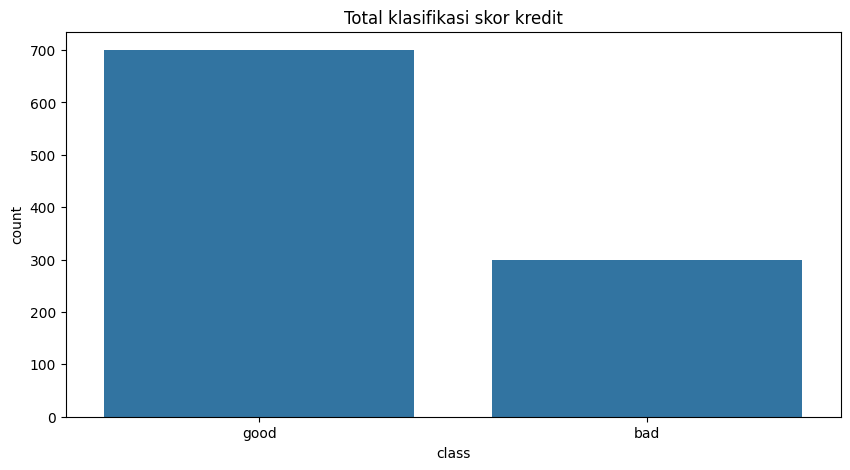

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='class', data=df)
plt.title('Total klasifikasi skor kredit')
plt.show()

Dataset ini memiliki jumlah credit score baik atau 'good' sebanyak 700 data, sedangkan buruk atau 'bad' sebanyak 300 data

### Distribusi Rentang Kelompok Usia

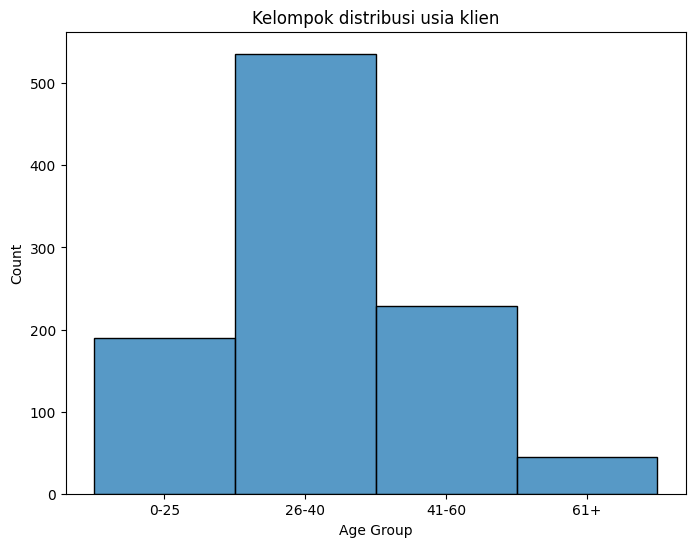

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 40, 60, 100], labels=['0-25', '26-40', '41-60', '61+'])

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age_group', stat='count')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Kelompok distribusi usia klien')
plt.show()

Pada tabel age distribution diketahui bahwa kelompok usia 26 hingga 40 tahun menjadi mayoritas peminjam kredit dengan total setengah dari banyaknya keseluruhan data, disusul oleh kategori usia 41 hingga 60, lalu usia 25 dan dibawahnya dan terakhir diusia 61 tahun keatas

### Klasifikasi Credit Class Berdasarkan Kelompok Umur

<ipython-input-8-a1a865e4339c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_counts_by_age = df.groupby(['age_group', 'class'])['class'].count().unstack()


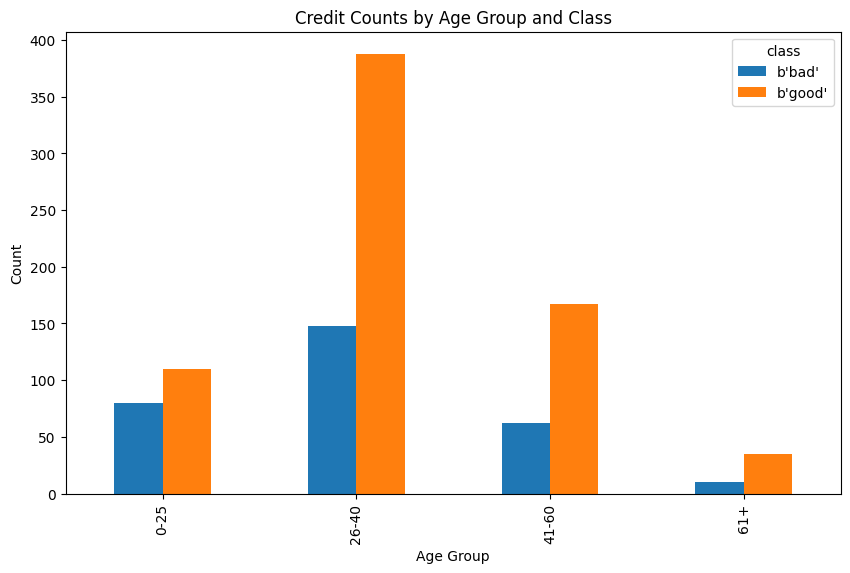

In [ ]:
credit_counts_by_age = df.groupby(['age_group', 'class'])['class'].count().unstack()

credit_counts_by_age.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Credit Counts by Age Group and Class')
plt.show()


Melalui pengamatan didapati bahwa ternyata dengan usia 26 hingga 40 tahun, nilai kredit skor yang tinggi sangatlah banyak jika dibandingkan dengan kelompok usia lainnya, disusul oleh kelompok usia 41-60, lalu usia 61 keatas dan usia 25 kebawah.

### Klasifikasi Berdasarkan Jenis Tempat Tinggal


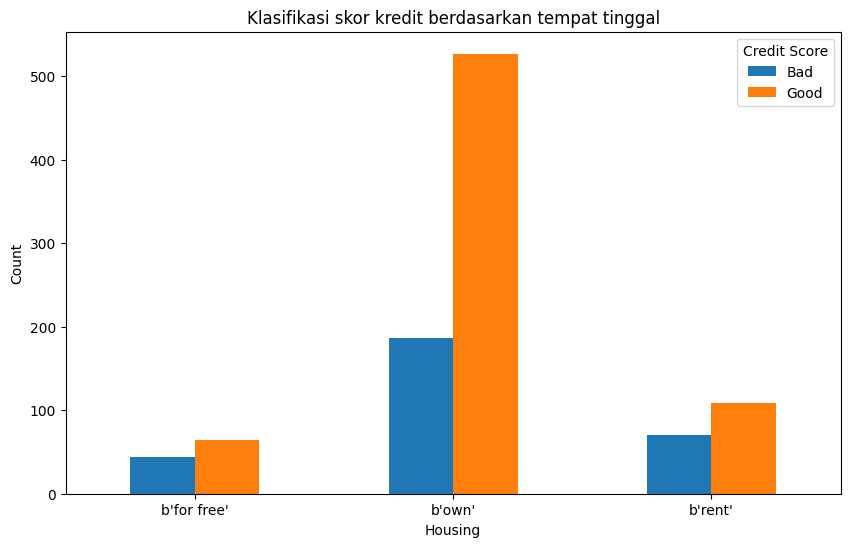

In [ ]:
housing_credit_counts = df.groupby(['housing', 'class'])['class'].count().unstack()

housing_credit_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Klasifikasi skor kredit berdasarkan tempat tinggal')
plt.xticks(rotation=0)
plt.legend(title='Credit Score', labels=['Bad', 'Good'])
plt.show()


Didapati bahwa klien yang memiliki tempat tinggal pribadi, memiliki nilai kredit yang mayoritas baik dibandingkan dengan klien yang tidak memiliki rumah sendiri atau menumpang, serta menyewa

# Preprocessing

In [ ]:
df = df.drop(columns=['age_group'])

In [ ]:
categorical_features = ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker']

df= pd.get_dummies(df,columns = categorical_features)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   duration                                          1000 non-null   float64
 1   credit_amount                                     1000 non-null   float64
 2   installment_commitment                            1000 non-null   float64
 3   residence_since                                   1000 non-null   float64
 4   age                                               1000 non-null   float64
 5   existing_credits                                  1000 non-null   float64
 6   num_dependents                                    1000 non-null   float64
 7   class                                             1000 non-null   object 
 8   checking_status_b'0<=X<200'                       1000 non-null   bool   
 9   checking_status_b'<0

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
encoder.classes_

array([b'bad', b'good'], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models and Result Analysis

### Performance Analysist Template

In [ ]:
def evaluate(model, X_validation, y_validation):
    start_time = time.time()
    process = psutil.Process()

    y_prediction = model.predict(X_validation)
    y_proba = model.predict_proba(X_validation)[:, 1]

    end_time = time.time()

    accuracy = accuracy_score(y_validation, y_prediction)
    precision = precision_score(y_validation, y_prediction, pos_label=1)
    recall = recall_score(y_validation, y_prediction, pos_label=1)
    f1 = f1_score(y_validation, y_prediction, pos_label=1)
    auc = roc_auc_score(y_validation, y_proba)
    execution_time = end_time - start_time

    print("Evaluation Results:")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-Score: ", f1)
    print("AUC: ", auc)
    print("Execution Time (s): ", execution_time)

### Logistic Regression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

evaluate(model_lr, X_test, y_test)

Evaluation Results:
Accuracy:  0.788
Precision:  0.8205128205128205
Recall:  0.898876404494382
F1-Score:  0.8579088471849866
AUC:  0.8153870162297129
Execution Time (s):  0.00462031364440918


Hasil :


Model berhasil mengklasifikasikan dengan benar kurang lebih 78% dari total data yang diujikan, nilai precision yang mencapai 82% menujukkan model dapat memprediksi benar positif dan menghindari false positif, dilanjutkan dengan nilai recal 89% yang cukup tinggi model dapat dengan sangat baik mendeteksi kasus positif dan mengurangi risiko false negatif, dilanjutkan dengan nilai f1-score 85% menujukan kesimbangkan yang tinggi dalam memprediksi nilai positif dan negatif, nilai AUC 81% menujukkan model baik dalam memisahkan nilai positif dan negatif, lalu waktu yang dibutuhkan model juga relatif cepat hanya 0.0046 detik.

### Random Forest

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

evaluate(model_rf, X_test, y_test)

Evaluation Results:
Accuracy:  0.74
Precision:  0.7627906976744186
Recall:  0.9213483146067416
F1-Score:  0.8346055979643767
AUC:  0.7784019975031211
Execution Time (s):  0.06772494316101074


Hasil:

Model berhasil mengklasifikasi dengan benar kurang lebih 74% dari dataset,precision yang dihasilkan tergolong rendah yaitu 76% jika dibandingkan dengan Logistic Regression, nilai recall yang sangat tinggi yaitu 92% menujukkan model sangat efektif dalam mendeteksi seabgain besar kelas positif yang benar, nilai F1-Score yang bernilai 83.5% menujukkan kesimbangakn yang cukup baik antara precision dengan nilai recall, nilai AUC sebesar 77.8% menunjukkan kemampuan standar model dalam memisahkan kelas yang positif dan negatif, lalu untuk waktu yang diperlukan relatif lebih lambat yaitu 0.0667 detik.


### XGBoost

In [ ]:
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

evaluate(model_xgb,X_test, y_test)

Evaluation Results:
Accuracy:  0.756
Precision:  0.8
Recall:  0.8764044943820225
F1-Score:  0.8364611260053619
AUC:  0.793227215980025
Execution Time (s):  0.0032587051391601562


Hasil:

Model berhasil mengklasifikasikan dengan benar sekitar 75.6%, nilai precision yang relatif baik yaitu 80% menujukkan klasifikasi true positif yang benar, nilai recal 87% menujukkan model sangat baik dalam mengenali seluruh kelas positif yang ada dalam dataset, nilai f1-score 83% menggabungkan precision dan recall menjadi kesatuan metric yang menujukkan keseimbangakn antara kemampuan model dalam mempredisiki kelas positif dengan beanr dan menghindari kesalahan dalam memrpediksi kelas positif, nilai AUC yang cukup tinggi yaotu 79% mengindetifikasikan bahwa model sudah cukup baik dalam memisahkan kelas positif dan negatif, akhir waktu yang digunakan relatif cepat yaitu 0.0032 detik untuk menyelesaikan pemodelan.



### Support Vektor Machines (SVM)

In [ ]:
model_svm = SVC(probability=True, random_state=42)
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

evaluate(model_svm, X_test, y_test)

Evaluation Results:
Accuracy:  0.748
Precision:  0.7777777777777778
Recall:  0.9044943820224719
F1-Score:  0.8363636363636364
AUC:  0.781289013732834
Execution Time (s):  0.03349947929382324


Hasil:

Model dapat menglasifikasikan kurang lebih 74.8% dari ttoal data uji dengan benar, dengan nilai precision yang relatif rendah yaitu hanya 77% jika dibandikan dengan model sebelumnya, nilai recal yang tinggi menunjukkan model dapat sangat baik dalam mendeteksi seluruh kasus postif dalam dataset, nilai f1-score yang relatif tinggi yaitu 83% juga menujukkan kemampuan model dalam menghindari prediksi kasus positif atau negatif, nilai AUC 0.7813 menunjukkan model memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif serta waktu pemodelan yang cepat yaitu 0.0335 detik.


### K-Nearest Neighbors (KNN)

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

evaluate(model_knn, X_test, y_test)

Evaluation Results:
Accuracy:  0.708
Precision:  0.7611940298507462
Recall:  0.8595505617977528
F1-Score:  0.8073878627968337
AUC:  0.7306491885143571
Execution Time (s):  0.028731584548950195


Hasil:

Model mendapatkan akurasi sebesar 70% yang dimana relatif sangat kecil jika dibandingkan dengan model lainnya, nilai precision yang relatif rendah juga yaitu 76%, lalu nilai recal yang cukup baik yaitu 85% menunjukkan model dapat memprediksi seluruh kasus positif dalam dataset, nilai f1-score tergolong baik yaotu 80% menunjukkan keseimbangan model dalam menghindari kasus posiif atau negatif, lalu nilai AUC 73% menujukkan model juga tidak terlalu baik jika dibandingkan dengan model-model sebelumnya dalam memisahkan kasus positif dan negatif, dan waktu pemodelan yang cepat yaitu 0.02 detik

# Conclusion

Berdasarkan hasil evaluasi, Logistic Regression adalah model terbaik dalam kasus ini karena memiliki akuras tinggi (78%), precision (82%), recall (89%), dan F1-Score (85%) yang seimbang serta AUC 81% yang menunjukkan kemampuan yang baik dalam membedakan antara kelas positif dan negatif. Waktu eksekusi yang cepat (0.0046 detik) menjadikan model ini efisien dan efektif secara komputasi.

Model ini adalah yang paling ideal untuk digunakan dalam tugas klasifikasi biner ini, mengingat performanya yang konsisten baik di semua metrik penting.